In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Download Dataset

In [4]:
!gdown 1J1eghnm5bPJTFcBUwTDHZhOP19YGpD6D

Downloading...
From: https://drive.google.com/uc?id=1J1eghnm5bPJTFcBUwTDHZhOP19YGpD6D
To: /content/used_cars.csv
100% 608k/608k [00:00<00:00, 7.93MB/s]


In [30]:
df = pd.read_csv("used_cars.csv")

# Preprocessing Dataset

## Read Infor

In [31]:
df.head()

brand                            model  model_year      milage  \
0      Ford  Utility Police Interceptor Base        2013  51,000 mi.   
1   Hyundai                     Palisade SEL        2021  34,742 mi.   
2     Lexus                    RX 350 RX 350        2022  22,372 mi.   
3  INFINITI                 Q50 Hybrid Sport        2015  88,900 mi.   
4      Audi        Q3 45 S line Premium Plus        2021   9,835 mi.   

       fuel_type                                             engine  \
0  E85 Flex Fuel  300.0HP 3.7L V6 Cylinder Engine Flex Fuel Capa...   
1       Gasoline                               3.8L V6 24V GDI DOHC   
2       Gasoline                                     3.5 Liter DOHC   
3         Hybrid  354.0HP 3.5L V6 Cylinder Engine Gas/Electric H...   
4       Gasoline                         2.0L I4 16V GDI DOHC Turbo   

        transmission                 ext_col int_col  \
0        6-Speed A/T                   Black   Black   
1  8-Speed Automatic         Moonlight Cloud    Gray   
2          Automatic                    Blue   Black   
3        7-Speed A/T                   Black   Black   
4  8-Speed Automatic  Glacier White Metallic   Black   

                                 accident clean_title    price  
0  At least 1 accident or damage reported         Yes  $10,300  
1  At least 1 accident or damage reported         Yes  $38,005  
2                           None reported         NaN  $54,598  
3                           None reported         Yes  $15,500  
4                           None reported         NaN  $34,999

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4009 entries, 0 to 4008
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   brand         4009 non-null   object
 1   model         4009 non-null   object
 2   model_year    4009 non-null   int64 
 3   milage        4009 non-null   object
 4   fuel_type     3839 non-null   object
 5   engine        4009 non-null   object
 6   transmission  4009 non-null   object
 7   ext_col       4009 non-null   object
 8   int_col       4009 non-null   object
 9   accident      3896 non-null   object
 10  clean_title   3413 non-null   object
 11  price         4009 non-null   object
dtypes: int64(1), object(11)
memory usage: 376.0+ KB


In [33]:
df.columns

Index(['brand', 'model', 'model_year', 'milage', 'fuel_type', 'engine',
       'transmission', 'ext_col', 'int_col', 'accident', 'clean_title',
       'price'],
      dtype='object')

## Select Input, Output

In [34]:
x = df['model_year']
y = df['price']

In [35]:
print(type(x[0]))

<class 'numpy.int64'>


In [36]:
print(type(y[0]))

<class 'str'>


In [37]:
print(y[0])

$10,300


In [10]:
# Check for NaN values in 'x'
nan_x = x.isnull().sum()
print(f"Number of NaN values in 'x': {nan_x}")

Number of NaN values in 'x': 0


In [11]:
# Check for NaN values in 'y'
nan_y = y.isnull().sum()
print(f"Number of NaN values in 'y': {nan_y}")

Number of NaN values in 'y': 0


In [21]:
print(y[0])

10300


In [45]:
print(type(y[0]))

<class 'str'>


In [46]:
for i in range(len(y)):
    y[i] = int(y[i][1:].replace(',', ''))

Streaming output truncated to the last 5000 lines.
<ipython-input-46-f099683aeddc>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y[i] = int(y[i][1:].replace(',', ''))
<ipython-input-46-f099683aeddc>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y[i] = int(y[i][1:].replace(',', ''))
<ipython-input-46-f099683aeddc>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y[i] = int(y[i][1:].replace(',', ''))
<ipython-input-46-f099683aeddc>

In [47]:
y.head()

0    10300
1    38005
2    54598
3    15500
4    34999
Name: price, dtype: object

In [48]:
print(type(y[0]))

<class 'int'>


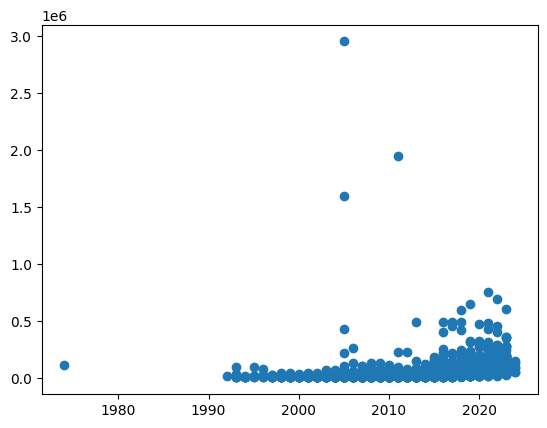

In [49]:
plt.scatter(x, y)

## Normalize

In [58]:
# Compute mean and std
x_mean = np.mean(x)
x_deno = max(x) - min(x)
y_mean = np.mean(y)
y_deno = max(y) - min(y)

In [59]:
# Normalize
x_normalized = (x - x_mean) / x_deno
y_normalized = (y - y_mean) / y_deno

## Dataset split

In [60]:
TRAIN_RATIO = 0.8
TEST_RATIO = 0.2

In [51]:
x_train = x[:int(TRAIN_RATIO * len(x))]
y_train = y[:int(TRAIN_RATIO * len(y))]
x_test = x[int(TRAIN_RATIO * len(x)):]
y_test = y[int(TRAIN_RATIO * len(y)):]

In [61]:
x_train = x_normalized[:int(TRAIN_RATIO * len(x_normalized))]
y_train = y_normalized[:int(TRAIN_RATIO * len(y_normalized))]
x_test = x_normalized[int(TRAIN_RATIO * len(x_normalized)):]
y_test = y_normalized[int(TRAIN_RATIO * len(y_normalized)):]

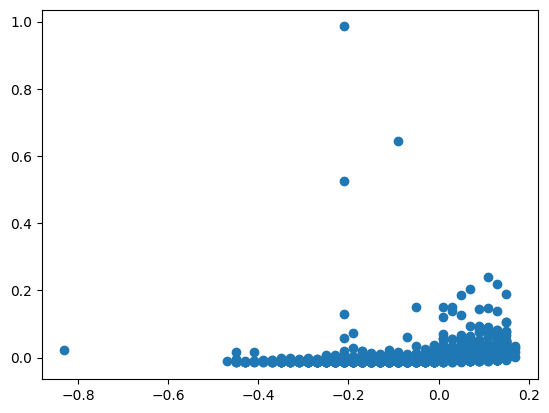

In [62]:
train_example = list(zip(x_train, y_train))
plt.scatter(x_train,y_train)

In [63]:
test_example = list(zip(x_test, y_test))
plt.scatter(x_test,y_test)

# Training

In [64]:
# Simple Linear Regression
def phi(x):
    return np.array([x, 1])  # Feature vector [x, 1]

def initialWeightVector():
    return np.zeros(2)  # w = [0, 0]

def trainloss(w):
    return (1.0 / len(train_example)) * sum((w.dot(phi(x_i)) - y_i)**2 for x_i, y_i in train_example)

def gradientTrainloss(w):
    return (1.0 / len(train_example)) * sum(2 * (w.dot(phi(x_i)) - y_i) * phi(x_i) for x_i, y_i in train_example)

def gradientDescent(L, gradientL, initialWeightVector, eta=0.01, max_iters=2000, step=2):
    w = initialWeightVector()
    history = []  # Store loss for plotting
    for i in range(max_iters):
        value = L(w)
        gradient = gradientL(w)
        w_new = w - eta * gradient
        history.append(value)
        # Print every 200 iterations
        if i % step == 0:
            grad_norm = np.linalg.norm(gradient)
            print(f"Epoch {i}: Weight Vector = {w}, TrainLoss = {value:.6f}, Gradient Norm = {grad_norm:.6f}")
        w = w_new
    return w, history

In [65]:
w, loss_history = gradientDescent(trainloss, gradientTrainloss, initialWeightVector, eta=0.01, max_iters=800, step=50)

Epoch 0: Weight Vector = [0. 0.], TrainLoss = 0.000824, Gradient Norm = 0.001398
Epoch 50: Weight Vector = [0.00061923 0.00020034], TrainLoss = 0.000823, Gradient Norm = 0.001250
Epoch 100: Weight Vector = [0.00122918 0.00027294], TrainLoss = 0.000823, Gradient Norm = 0.001213
Epoch 150: Weight Vector = [0.00183007 0.00029903], TrainLoss = 0.000822, Gradient Norm = 0.001193
Epoch 200: Weight Vector = [0.00242205 0.00030818], TrainLoss = 0.000821, Gradient Norm = 0.001175
Epoch 250: Weight Vector = [0.00300526 0.00031117], TrainLoss = 0.000821, Gradient Norm = 0.001158
Epoch 300: Weight Vector = [0.00357984 0.00031192], TrainLoss = 0.000820, Gradient Norm = 0.001140
Epoch 350: Weight Vector = [0.00414592 0.00031186], TrainLoss = 0.000819, Gradient Norm = 0.001124
Epoch 400: Weight Vector = [0.00470363 0.00031151], TrainLoss = 0.000819, Gradient Norm = 0.001107
Epoch 450: Weight Vector = [0.00525308 0.00031106], TrainLoss = 0.000818, Gradient Norm = 0.001091
Epoch 500: Weight Vector = [0

# Visualize test

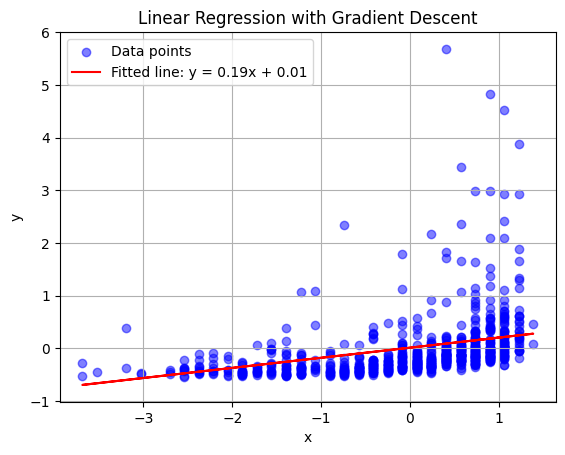

In [ ]:
# Plot data and fitted line
plt.scatter(x_test, y_test, color='blue', label='Data points', alpha=0.5)
y_predict = w[0] * x_test + w[1]
plt.plot(x_test, y_predict, color='red', label=f'Fitted line: y = {w[0]:.2f}x + {w[1]:.2f}')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Linear Regression with Gradient Descent')
plt.legend()
plt.grid(True)
plt.show()

In [66]:
# Predict
car_model_year = 2018
car_model_year_norm = (car_model_year - x_mean) / x_deno
price = w[0] * car_model_year_norm + w[1]
price_denormalized = price * y_deno + y_mean
print(f"Predicted price for a car with model year {car_model_year}: ${price_denormalized:.2f}")

Predicted price for a car with model year 2018: $46763.87


In [71]:
df[["model_year", "price"]][df["model_year"]==2018]

model_year   price
19          2018   68750
30          2018   48000
36          2018   33598
60          2018   42000
61          2018  144900
...          ...     ...
3968        2018   34995
3986        2018   61000
3990        2018   38000
3997        2018   17899
4003        2018   25900

[315 rows x 2 columns]

In [ ]:
# Plot loss over iterations
plt.plot(loss_history, color='green')
plt.xlabel('Iteration')
plt.ylabel('Train Loss')
plt.title('Training Loss over Iterations')
plt.grid(True)
plt.show()